Импортируем из sklearn датасет с фотографиями президентов.


In [40]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
faces['target_names']

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
faces.images.shape

(1348, 62, 47)

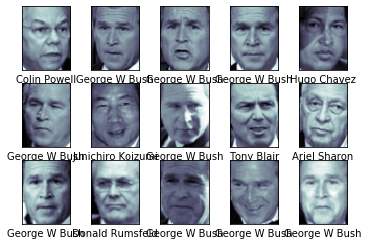

In [41]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Используем препроцессор PCA (метод главных компонент) для выделения из 3000 пикселей 150 осмысленных признаков, которые передадим нашему классификатору SVC на основе метода опорных векторов.

In [15]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True, random_state = 42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)
model

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=150,
                     random_state=42, svd_solver='auto', tol=0.0,
                     whiten=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200,
                     class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='scale',
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [34]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state = 42)

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)
grid.best_params_

CPU times: user 1min 33s, sys: 1.27 s, total: 1min 34s
Wall time: 50.1 s


{'svc__C': 10, 'svc__gamma': 0.001}

In [25]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

array([3, 4, 3, 6, 6, 1, 3, 3, 3, 1, 3, 3, 0, 3, 3, 1, 7, 2, 3, 2, 7, 7,
       5, 5, 0, 3, 6, 7, 3, 3, 0, 6, 3, 3, 3, 3, 2, 3, 3, 0, 3, 3, 7, 1,
       3, 3, 0, 2, 1, 2, 7, 3, 7, 6, 7, 3, 7, 1, 7, 0, 4, 2, 3, 2, 5, 4,
       7, 3, 4, 1, 1, 5, 4, 1, 3, 3, 0, 4, 3, 3, 1, 3, 1, 0, 3, 2, 3, 2,
       7, 1, 1, 1, 2, 7, 3, 7, 7, 3, 3, 1, 3, 7, 1, 4, 3, 3, 0, 3, 7, 0,
       3, 1, 0, 2, 3, 1, 3, 2, 7, 4, 7, 7, 5, 2, 3, 3, 3, 3, 2, 2, 3, 7,
       0, 3, 4, 3, 4, 1, 2, 1, 7, 6, 5, 3, 3, 1, 1, 3, 5, 4, 3, 2, 7, 1,
       7, 1, 3, 7, 1, 4, 6, 1, 2, 3, 2, 3, 1, 7, 2, 2, 1, 7, 3, 3, 1, 1,
       1, 3, 3, 0, 0, 4, 1, 1, 7, 1, 1, 5, 3, 4, 7, 3, 4, 5, 6, 3, 7, 3,
       3, 2, 3, 3, 2, 3, 3, 6, 3, 3, 1, 7, 3, 6, 1, 2, 3, 1, 1, 7, 6, 3,
       1, 3, 1, 7, 7, 2, 7, 7, 5, 7, 1, 3, 3, 7, 4, 7, 7, 2, 3, 1, 3, 4,
       3, 1, 4, 3, 1, 1, 5, 1, 2, 3, 4, 1, 1, 1, 2, 2, 3, 7, 3, 7, 3, 7,
       3, 1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 3, 4, 3, 1, 4, 1, 4, 0, 3, 2, 0,
       2, 5, 1, 3, 3, 6, 2, 2, 3, 6, 3, 1, 1, 5, 1,

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

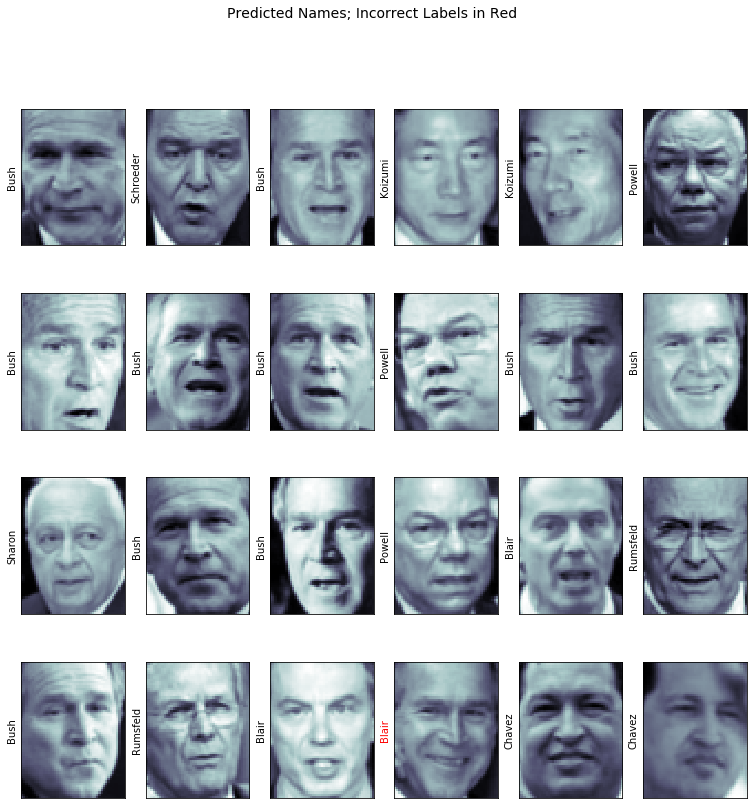

In [31]:
fig, ax = plt.subplots(4, 6, figsize = (13, 13))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)    

In [32]:
from sklearn.metrics import classification_report
classification_report(ytest, yfit, target_names = faces.target_names)

'                   precision    recall  f1-score   support\n\n     Ariel Sharon       0.65      0.73      0.69        15\n     Colin Powell       0.80      0.87      0.83        68\n  Donald Rumsfeld       0.74      0.84      0.79        31\n    George W Bush       0.92      0.83      0.88       126\nGerhard Schroeder       0.86      0.83      0.84        23\n      Hugo Chavez       0.93      0.70      0.80        20\nJunichiro Koizumi       0.92      1.00      0.96        12\n       Tony Blair       0.85      0.95      0.90        42\n\n         accuracy                           0.85       337\n        macro avg       0.83      0.84      0.84       337\n     weighted avg       0.86      0.85      0.85       337\n'

Text(91.68, 0.5, 'predicted label')

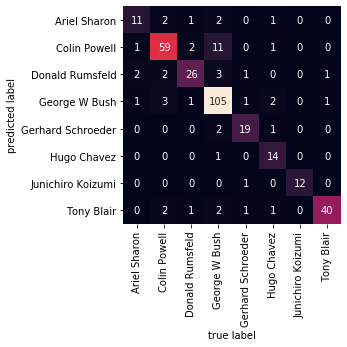

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')